In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
df_train = pd.read_csv('/kaggle/input/titanic/train.csv')
df_test = pd.read_csv('/kaggle/input/titanic/test.csv')

In [3]:
df_train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Data cleaning

In [5]:
#Check missing values
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
#Let's drop Cabin column as it has many null value
df_train.drop('Cabin', axis = 1, inplace = True)

In [7]:
#Fill null values in Age column with mean
df_train['Age'] = df_train['Age'].fillna(df_train['Age'].mean())

In [8]:
df_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [9]:
#Let's fill Embarked value with mode
df_train['Embarked'] = df_train['Embarked'].fillna(df_train['Embarked'].mode()[0])

In [10]:
df_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

<Axes: >

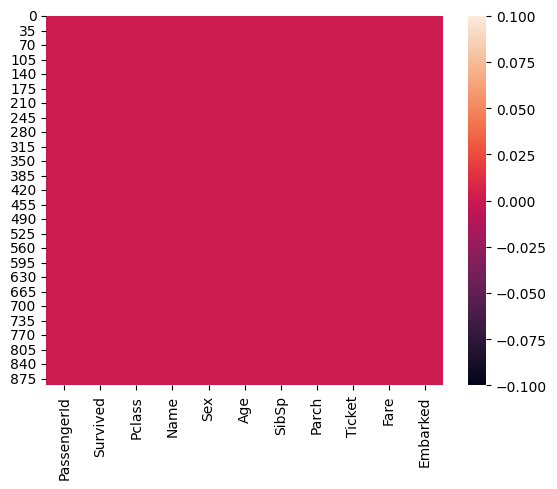

In [11]:
import seaborn as sns
sns.heatmap(df_train.isnull())

In [12]:
## We will perform the same thing with test data as well. 
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [13]:
#Let's drop Cabin column as it has many null value
df_test.drop('Cabin', axis = 1, inplace = True)

#Fill null values in Age column with mean
df_test['Age'] = df_test['Age'].fillna(df_test['Age'].mean())

#Fill Embarked missing value with mode
df_test['Fare'] = df_test['Fare'].fillna(df_test['Fare'].mean())

In [14]:
df_test.shape

(418, 10)

<Axes: >

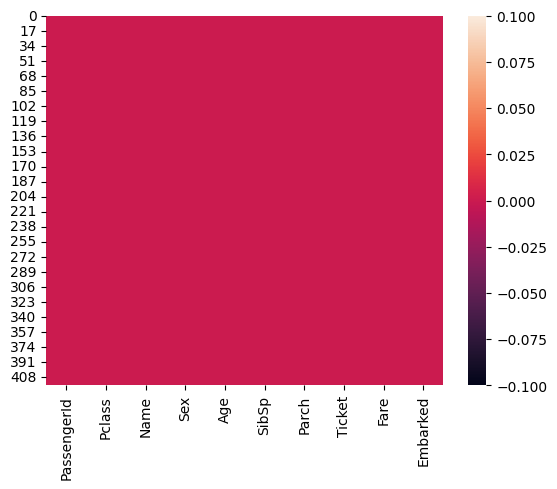

In [15]:
sns.heatmap(df_test.isnull())

In [16]:
df_train.duplicated().sum()

0

* No duplicate value found

## Data Featuring

In [17]:
df_train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S


In [18]:
## Title extraction:
df_train['Title'] = df_train['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [19]:
df_train['Title'].value_counts()

Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64

In [20]:
## Let's group rare titles
rare_titles = ['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona']
df_train['Title'] = df_train['Title'].replace(rare_titles, 'Rare')
df_train['Title'] = df_train['Title'].replace({'Mlle':'Miss', 'Ms':'Miss', 'Mme':'Mrs'})

In [21]:
df_train['Title'].value_counts()

Title
Mr        517
Miss      185
Mrs       126
Master     40
Rare       23
Name: count, dtype: int64

In [22]:
# Family size feature
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1

## IsAlone
df_train['IsAlone'] = (df_train['FamilySize']==1).astype(int)

In [23]:
df_train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,FamilySize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs,2,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,1,1


In [24]:
## Will follow the same method for Test data

## Title extraction:
df_test['Title'] = df_test['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

## Let's group rare titles
rare_titles = ['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona']
df_test['Title'] = df_test['Title'].replace(rare_titles, 'Rare')
df_test['Title'] = df_test['Title'].replace({'Mlle':'Miss', 'Ms':'Miss', 'Mme':'Mrs'})

# Family size feature
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1

## IsAlone
df_test['IsAlone'] = (df_test['FamilySize']==1).astype(int)

In [25]:
df_test.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,FamilySize,IsAlone
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,Mr,1,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,Mrs,2,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,Mr,1,1


In [26]:
#Let's remove unnecessary columns like passengerid and name
df_train.drop(['PassengerId','Name','Ticket'], axis = 1, inplace = True)
df_test.drop(['PassengerId','Name','Ticket'], axis = 1, inplace = True)

In [27]:
df_train.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone
0,0,3,male,22.0,1,0,7.2500,S,Mr,2,0
1,1,1,female,38.0,1,0,71.2833,C,Mrs,2,0
2,1,3,female,26.0,0,0,7.9250,S,Miss,1,1


In [28]:
#To check number of unique values in categorical column
df_train[['Sex','Embarked']].nunique()

Sex         2
Embarked    3
dtype: int64

In [29]:
#Now let's convert string colulmn in numerice using one hot encoding
df_train = pd.get_dummies(df_train, drop_first = True, dtype = int)
df_test = pd.get_dummies(df_test, drop_first = True, dtype = int)

In [30]:
df_train.head(3)

,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize,IsAlone,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,0,3,22.0,1,0,7.2500,2,0,1,0,1,0,1,0,0
1,1,1,38.0,1,0,71.2833,2,0,0,0,0,0,0,1,0
2,1,3,26.0,0,0,7.9250,1,1,0,0,1,1,0,0,0


In [31]:
df_train.shape

(891, 15)

In [32]:
df_test.head(3)

,Pclass,Age,SibSp,Parch,Fare,FamilySize,IsAlone,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,3,34.5,0,0,7.8292,1,1,1,1,0,0,1,0,0
1,3,47.0,1,0,7.0000,2,0,0,0,1,0,0,1,0
2,2,62.0,0,0,9.6875,1,1,1,1,0,0,1,0,0


In [33]:
#Let's create feature and lable with train and test
X_train = df_train.drop('Survived', axis = 1)
y_train = df_train['Survived']
X_test = df_test

## Model Selection using K-fold cross validation

In [34]:
## We will test four model to decide which one performs best.
# Import the necessary libraries

from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb

In [35]:
#Let's first check the accuracy from logistic regression
cross_val_score(LogisticRegression(max_iter=1000),X_train, y_train, cv=5).mean()

0.8170547988199109

In [36]:
#Let's result for all models

models = {"LogisticRegression":LogisticRegression(max_iter=1000),
         "RandomForestClassifier": RandomForestClassifier(n_estimators=50),
         "SVM": SVC(),
         "Xgboost": xgb.XGBClassifier(eval_metric="logloss")}

In [37]:
result = {}

for name,model in models.items():
    model_score = cross_val_score(model,X_train,y_train,cv=5)
    result[name] = model_score.mean()

print(result)

{'LogisticRegression': 0.8170547988199109, 'RandomForestClassifier': 0.8069675475488042, 'SVM': 0.6712572970937167, 'Xgboost': 0.8136902893729208}


From these results:

LogisticRegression performs the best (highest mean CV score: 0.8170)
Xgboostt is close behind (0.8136)

So right now, LogisticRegression seems the best-performing model.

But this is important to understand these are default parameters. We can still improve model performance through hyperparameter tuning. Will try top three models with hyperparameters

## Hyperparameter Tuning
Will try different hyperparameters for each top-performing model (especially for XGBoost and Random Forest)

In [38]:
## Example.2: RandomizedSearchCV for XGBoost
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb

# Define parameter grid (wider search)
xgb_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]}

xgb_clf = xgb.XGBClassifier(eval_metric="logloss", random_state=42)

rand_xgb = RandomizedSearchCV(estimator=xgb_clf,
                              param_distributions=xgb_params,
                              n_iter=20,  # tries 20 random combos
                              cv=5,
                              scoring='accuracy',
                              n_jobs=-1,
                              random_state=42)

rand_xgb.fit(X_train, y_train)

print("Best XGB Parameters:", rand_xgb.best_params_)
print("Best XGB CV Accuracy:", rand_xgb.best_score_)

Best XGB Parameters: {'subsample': 0.7, 'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.05, 'colsample_bytree': 0.8}
Best XGB CV Accuracy: 0.8428598330299415


In [39]:
### Example.2: GridSearchCV for Random Forest
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define parameter grid
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

rf = RandomForestClassifier(random_state=42)

grid_rf = GridSearchCV(estimator=rf,
                       param_grid=rf_params,
                       cv=5,
                       scoring='accuracy',
                       n_jobs=-1)

grid_rf.fit(X_train, y_train)

print("Best RF Parameters:", grid_rf.best_params_)
print("Best RF CV Accuracy:", grid_rf.best_score_)

Best RF Parameters: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 200}
Best RF CV Accuracy: 0.8339087314041805


* Both models are performing almost equally well. Will go with Random Forest 

In [40]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(max_depth = None, 
                                  min_samples_split = 10, 
                                  n_estimators = 200)
rf_model.fit(X_train,y_train)
y_pred = rf_model.predict(X_test)

In [41]:
sample_submission = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')
sample_submission.head(3)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0


In [42]:
submission = pd.DataFrame({"PassengerId": sample_submission['PassengerId'],
                           'Survived': y_pred})

In [43]:
submission.to_csv("rf_submission.csv", index=False)

## Will use LogisticRegression Model for better accuracy result. 
As it was best model based on K-fold cross validation score

In [44]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from scipy.stats import loguniform

# Base model
log_model = LogisticRegression(max_iter=5000, random_state=42)

# Parameter grid for RandomizedSearchCV
param_distributions = {
    'C': loguniform(0.001, 10),               # Regularization strength
    'penalty': ['l1', 'l2', 'elasticnet'],    # Regularization type
    'solver': ['liblinear', 'saga'],          # solvers compatible with penalties
}

# Randomized search
log_search = RandomizedSearchCV(
    estimator=log_model,
    param_distributions=param_distributions,
    n_iter=50,             # Number of parameter settings sampled
    scoring='accuracy',
    cv=5,
    random_state=42,
    n_jobs=-1
)

# Fit search
log_search.fit(X_train, y_train)

# Best results
print("Best Parameters:", log_search.best_params_)
print("Best CV Accuracy:", log_search.best_score_)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

Best Parameters: {'C': 4.869640941520899, 'penalty': 'l2', 'solver': 'liblinear'}
Best CV Accuracy: 0.8204130311970372


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
70 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py",

In [45]:
from sklearn.linear_model import LogisticRegression

# Best tuned model (cleaned)
model = LogisticRegression(
    C = 4.869640941520899,  
    penalty = 'l2',         
    solver = 'liblinear',    
    max_iter = 5000,
    random_state = 42
)

# Fit the model
model.fit(X_train, y_train)

# Predict on test data
y_prediction = model.predict(X_test)

In [46]:
sample_submission = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')
sample_submission.head(3)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0


In [47]:
submission = pd.DataFrame({"PassengerId": sample_submission['PassengerId'],
                           'Survived': y_prediction})

In [48]:
submission.to_csv("updated_submission.csv", index=False)